In [2]:
using QuadGK
using Polynomials
using Plots

# zad 1


In [101]:
mem = Vector{Polynomial}(undef, 1000)
function legendre(n::Int64)
    if n==0
        if isassigned(mem,n+1)
            return mem[n+1]
        else
            mem[n+1]=Polynomial([1])
            mem[n+1]
        end
    elseif n==1 
        if isassigned(mem,n+1)
            return mem[n+1]
        else
            mem[n+1]=Polynomial([0,1])
            mem[n+1]
        end
    else
        if isassigned(mem,n+1)
            return mem[n+1]
        else
            mem[n+1]=((((2*n)-1)/n)*Polynomial([0,1])*legendre(n-1)) - (((n-1)/n)*legendre(n-2))
            mem[n+1]
        end
    end
end


legendre (generic function with 1 method)

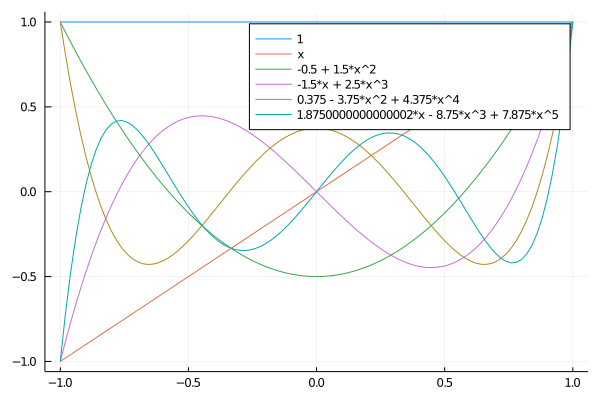

In [115]:
plot(legendre(0), -1 , 1)

for i in 1:5
    x = plot!(legendre(i ), -1 , 1)
end
x

In [126]:
lege_roots = roots(legendre(4))
(xp, a) = gauss(Float64,4)
print(xp , "\n")
print(lege_roots , "\n")


lege_roots = roots(legendre(6))
(xp, a) = gauss(Float64,6)
print(xp , "\n")
print(lege_roots)

[-0.8611363115940526, -0.3399810435848563, 0.3399810435848563, 0.8611363115940526]
[-0.8611363115940536, -0.33998104358485653, 0.3399810435848563, 0.8611363115940531]
[-0.932469514203152, -0.6612093864662645, -0.23861918608319696, 0.23861918608319693, 0.6612093864662645, 0.932469514203152]
[-0.9324695142031512, -0.6612093864662644, -0.23861918608319688, 0.23861918608319696, 0.6612093864662646, 0.9324695142031507]

tw mowi ze odciete n-punktowej kwadratury gausa sa zerami wielomianu ortagonalnego o wspolnej funkcji wiazacej i tego samego przedzialu

# zad 2

In [40]:
function integral_with_gauss(n::Int64 , f::Function)
    (xp, a) = gauss(Float64,n)
    sum(a .* f.(xp))
    
end


integral_with_gauss (generic function with 1 method)

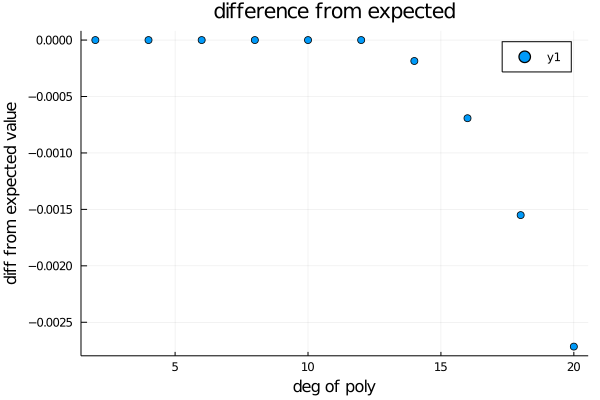

In [41]:
deg = 2:2:20
expected=[ 2/(i+1) for i in deg]
calculated = [ integral_with_gauss(7,x->x^i) - expected[Int(i/2)] for i in deg]
scatter(deg , calculated , title="difference from expected" , xlabel="deg of poly" , ylabel="diff from expected value"  )

mozna uzyskac dokladnosc do 2n - 1 bo to jest dokladnosc dla n - kwaddratury

# zad 3

In [51]:
function normalization(base::Function ,a::Float64, b::Float64 ,n::Int64)
    g(x) = base((2*x - b - a)/(b - a))
    return integral_with_gauss(n, g)
end
normalization(x->x^2 , 0 , 2)

LoadError: [91mMethodError: no method matching +(::Int64, ::Array{Float64,1})[39m
[91mFor element-wise addition, use broadcasting with dot syntax: scalar .+ array[39m
[91m[0mClosest candidates are:[39m
[91m[0m  +(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at operators.jl:538[39m
[91m[0m  +(::T, [91m::T[39m) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} at int.jl:86[39m
[91m[0m  +(::Integer, [91m::Integer[39m) at int.jl:918[39m
[91m[0m  ...[39m

In [65]:
fa(x)=x^2
g(x) = fa((2*x - 2 - 0)/(2 - 0))
x2res = integral_with_gauss(7 ,g) 
x2exp = quadgk(fa ,0 , 2)[1]


fa2(x)=exp(-x^2)
g2(x) = fa2((2*x - 15 - 5)/(15 - 5))
expres = integral_with_gauss(7 ,g2)
exp_expected = quadgk(fa2 , 5 , 15)[1]

fasin(x)=sin(x)*cos(2*x)
gsin(x) = fasin((2*x - 3*pi - pi)/(3*pi - pi))
sinres = integral_with_gauss(7 ,gsin)
sin_expected = quadgk(fasin , pi , 3*pi)[1]

println("x^2 result: " , x2res , " expected: " , x2exp)
println("exp(-x^2) result: " , expres , " expected: " , exp_expected)
println("sin(x)*cos(2*x) result: " , sinres , " expected: " , sin_expected)

x^2 result: 2.6666666666666665 expected: 2.6666666666666665
exp(-x^2) result: 0.040086933231733596 expected: 1.3625382666231845e-12
sin(x)*cos(2*x) result: 1.1328639922059272 expected: 1.2758466443306456e-14


# zad 4


In [5]:
f(x)= x^2
r = quadgk(f , 0, 1)
g(x) = (1/sqrt(2*pi))*exp((-x^2)/2)
r2 = quadgk(g , -Inf, Inf)
r


(0.3333333333333333, 5.551115123125783e-17)

# zad 5

In [41]:
function rectangle_inte(n::Int64 , f::Function , start , finish)
    sum=0
    w = (finish-start)/n
    for i in 0:n-1
        p = start + i*w
        sum += w*f(p)
    end
    return sum
end
    

rectangle_inte (generic function with 4 methods)

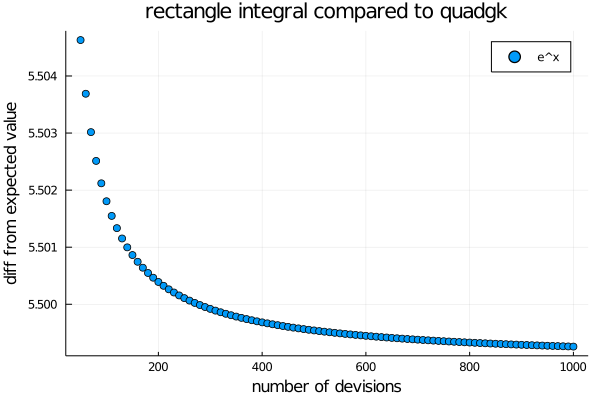

In [59]:

expected = quadgk(exp , 0, 2)[1]
xexp = 50:10:1000
yexp = [abs(rectangle_inte(i, exp, 0, 2/pi) - expected) for i in xexp]
expectedsin = quadgk(sin , 0, 2/pi)[1]
xsin = 50:10:1000
ysin = [abs(rectangle_inte(i, sin, 0, 2/pi) - expectedsin) for i in x]

scatter(xexp , yexp , xlabel="number of devisions" , ylabel="diff from expected value", label="e^x" , title="rectangle integral compared to quadgk" )
#scatter!(xsin , ysin , label="sin(x)")

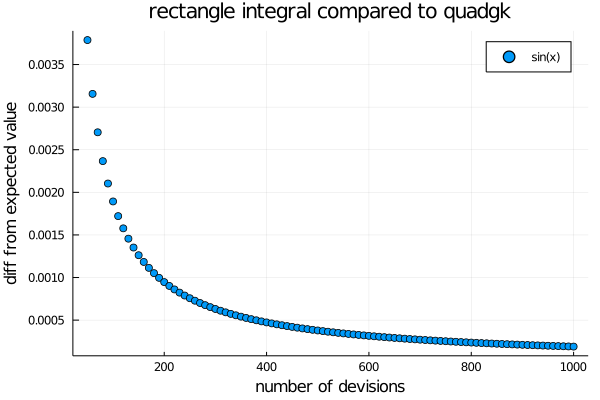

In [53]:
scatter(xsin , ysin , xlabel="number of devisions" , ylabel="diff from expected value", label="sin(x)" , title="rectangle integral compared to quadgk" )
